### USE CASE
#### This dataset is useful for analyzing trends in book publishing, evaluating author performance, understanding reader preferences, and assessing the financial success of books based on key metrics such as ratings, price, and units sold.


In [1]:
# Importing Libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loadinng the dataset
df = pd.read_csv(r'Books_Data.csv')

In [3]:
# Looking Some Data
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [5]:
# Statistical Summary of the Dataset
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [6]:
# Focusing on Modern Publication
df = df[df['Publishing Year']>1900]

In [7]:
# Checking for Null Vbinalues
df.isnull().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [8]:
# Removing records with missing book title
df.dropna(subset='Book Name', inplace= True)

In [9]:
# Checking for Duplicate Records
df.duplicated().sum()

np.int64(0)

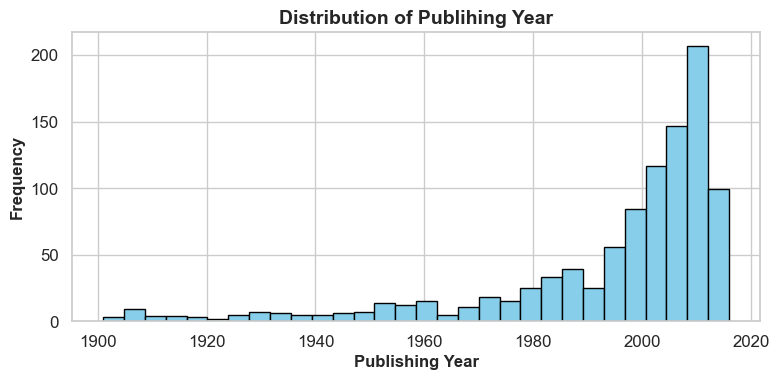

In [10]:
#Distribution of Publihing Year

sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.1)

plt.figure(figsize=(8,4))

plt.hist(df['Publishing Year'], bins = 30, color= 'skyblue', edgecolor= 'black')

plt.xlabel('Publishing Year', fontsize = 12, weight = 'bold')
plt.ylabel('Frequency', fontsize= 12, weight = 'bold')
plt.title('Distribution of Publihing Year', fontsize = 14, weight = 'bold')

plt.tight_layout()
# plt.savefig('distribution of Publishing Year')
plt.show()

        

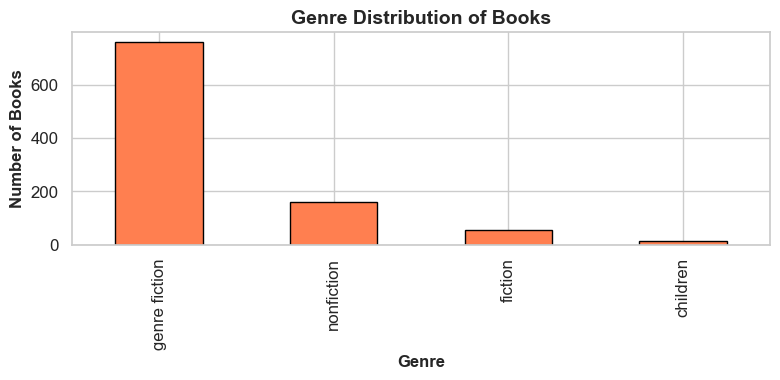

In [11]:
# Genre Distribution of Books

sns.set(style = 'whitegrid', palette = 'pastel', font_scale = 1.1)

plt.figure(figsize = (8,4))

df['genre'].value_counts().plot(kind = 'bar', color = 'coral', edgecolor = 'black')

plt.xlabel('Genre', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of Books', fontsize = 12, fontweight = 'bold')
plt.title('Genre Distribution of Books', fontsize = 14, weight = 'bold')

plt.tight_layout()
plt.savefig('Genre Distribution of Books')
plt.show()

In [12]:
# Average Book Ratings by Author 
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending = False).to_frame('Book Average Rating').reset_index()

,Author,Book Average Rating
0,Bill Watterson,4.650000
1,"Bill Watterson, G.B. Trudeau",4.610000
2,J.R.R. Tolkien,4.590000
3,George R.R. Martin,4.560000
4,Sarah J. Maas,4.526000
...,...,...
664,Chetan Bhagat,3.273333
665,Audrey Niffenegger,3.230000
666,"Herman Koch, Sam Garrett",3.220000
667,P.D. James,3.210000


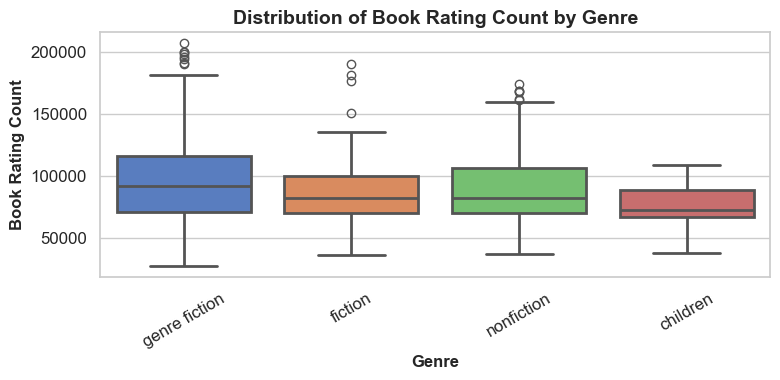

In [13]:
# Distribution of Book Ratings Count by Genre

sns.set(style = 'whitegrid', palette = "Set2", font_scale = 1.1)
plt.figure(figsize= (8,4))

sns.boxplot(x = 'genre', y = 'Book_ratings_count', data = df, palette = 'muted', linewidth = 2)

plt.xlabel('Genre', fontsize = 12, fontweight = 'bold')
plt.ylabel('Book Rating Count', fontsize = 12, fontweight = 'bold')
plt.title('Distribution of Book Rating Count by Genre', fontsize = 14, weight = 'bold')

plt.xticks(rotation = 30 )
plt.tight_layout()
plt.savefig('Distribution of Book Rating Count by Genre')
plt.show()

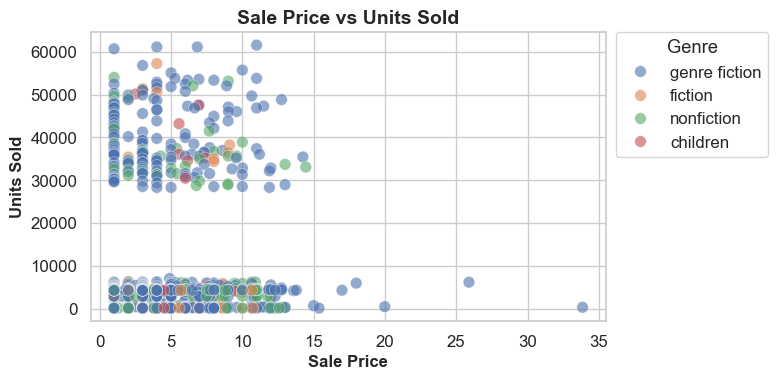

In [14]:
# Sale Price vs. Units Sold

sns.set(style ='whitegrid', font_scale = 1.1)

plt.figure(figsize= (8,4))

sns.scatterplot(
    data = df, 
    x = 'sale price',
    y = 'units sold',
    hue = 'genre',
    alpha = 0.6, 
    s = 70, 
    edgecolor = 'white', 
    linewidth = 0.4
)

plt.title('Sale Price vs Units Sold', fontsize = 14, weight = 'bold')
plt.xlabel('Sale Price', fontsize = 12, fontweight = 'bold' )
plt.ylabel('Units Sold', fontsize = 12, fontweight = 'bold')
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.savefig('Sale Price vs Units Sold')
plt.show()

In [15]:
# how many books are available in each language
language_counts = df['language_code'].value_counts()
language_counts

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

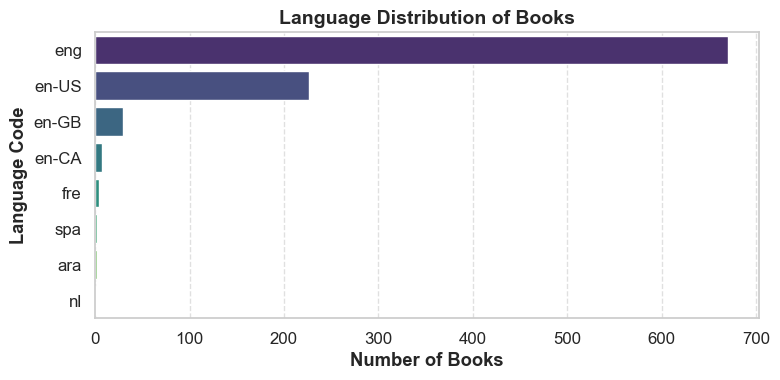

In [16]:
# Language Distribution in the Dataset

plt.figure(figsize=(8,4))
sns.barplot(
    x = language_counts.values,
    y = language_counts.index, 
    palette= 'viridis'
)

plt.xlabel('Number of Books',fontweight = 'bold')
plt.ylabel('Language Code', fontweight = 'bold')
plt.title('Language Distribution of Books', fontsize = 14, weight = 'bold')
plt.grid(axis='x', linestyle = '--', alpha = 0.6)

plt.tight_layout() 
plt.savefig('Language Distribution of Books')
plt.show()

In [17]:
# Top Publisher by Revenue
df.groupby('Publisher ')['publisher revenue'] .sum().sort_values(ascending = False).to_frame('Publisher Revenue').reset_index()

,Publisher,Publisher Revenue
0,Penguin Group (USA) LLC,191581.104
1,Random House LLC,174956.244
2,"Amazon Digital Services, Inc.",141767.772
3,HarperCollins Publishers,121769.814
4,Hachette Book Group,107410.968
5,Simon and Schuster Digital Sales Inc,46858.206
6,Macmillan,31249.830
7,HarperCollins Publishing,2830.806
8,HarperCollins Christian Publishing,2135.670


In [18]:
# Popular Author Rating by Reader Engagement
df.groupby('Author_Rating')['Book_ratings_count'].mean().sort_values(ascending = False).to_frame('Book Rating Count').reset_index()

,Author_Rating,Book Rating Count
0,Intermediate,101400.272569
1,Famous,98295.250000
2,Novice,87318.464286
3,Excellent,83804.800595


In [19]:
#  Language Popularity in the dataset
df.groupby('language_code').size().sort_values(ascending= False).to_frame('count_code').reset_index()

,language_code,count_code
0,eng,670
1,en-US,226
2,en-GB,29
3,en-CA,7
4,fre,4
5,ara,2
6,spa,2
7,nl,1


In [20]:
# Variance in Book Rating Count by Author Rating
df.groupby('Author_Rating')['Book_ratings_count'].var().to_frame('count')

,count
Author_Rating,
Excellent,4.419857e+08
Famous,1.227555e+09
Intermediate,1.170331e+09
Novice,9.523157e+08


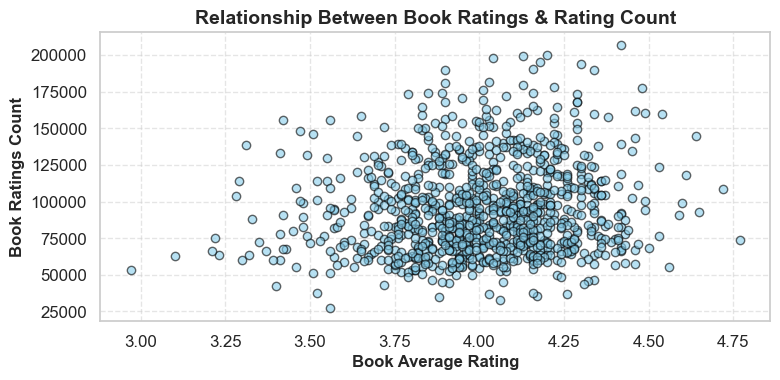

In [21]:
# Relationship Between Book Ratings & Rating Count

plt.figure(figsize=(8,4))
plt.scatter(df['Book_average_rating'],df['Book_ratings_count'], alpha = 0.6, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Book Average Rating', fontsize = 12, fontweight = 'bold')
plt.ylabel('Book Ratings Count', fontsize = 12, fontweight = 'bold')
plt.title('Relationship Between Book Ratings & Rating Count', fontsize = 14, fontweight = 'bold')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.savefig('Relationship Between Book Ratings & Rating Count')
plt.show()

In [22]:
# Total Gross Sales by Author
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum()
total_gross_sales_by_author

Author
A.A. Milne, Ernest H. Shepard                       214.92
A.S.A. Harrison                                     784.16
Abbi Glines                                        2990.16
Adam Johnson                                        108.90
Adam Mansbach, Ricardo CortÃ©s                      113.85
                                                    ...   
William Styron                                      220.89
Yana Toboso, Tomo Kimura                           1366.86
Zadie Smith                                         167.31
Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi    1200.10
Ø£Ø­Ù…Ø¯ Ù…Ø±Ø§Ø¯                                  1128.87
Name: gross sales, Length: 669, dtype: float64

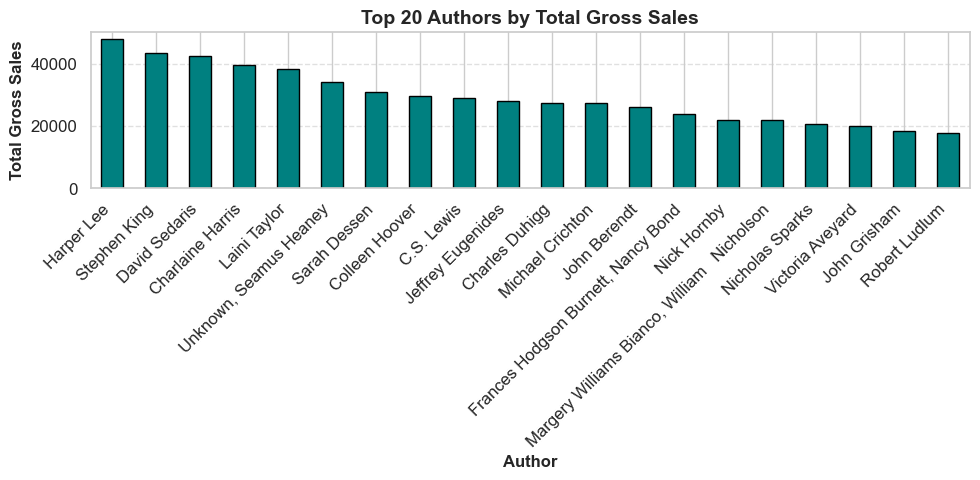

In [26]:
# Top 20 Authors by Total Gross Sales

plt.figure(figsize = (10,5))
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(
    kind = 'bar',
    color = 'teal',
    edgecolor = 'black'
)

plt.xlabel('Author', fontsize = 12, fontweight = 'bold') 
plt.ylabel('Total Gross Sales', fontsize = 12, fontweight = 'bold') 
plt.title('Top 20 Authors by Total Gross Sales', fontsize= 14, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

plt.tight_layout()
plt.savefig('Top 20 Authors by Total Gross Sales')
plt.show()

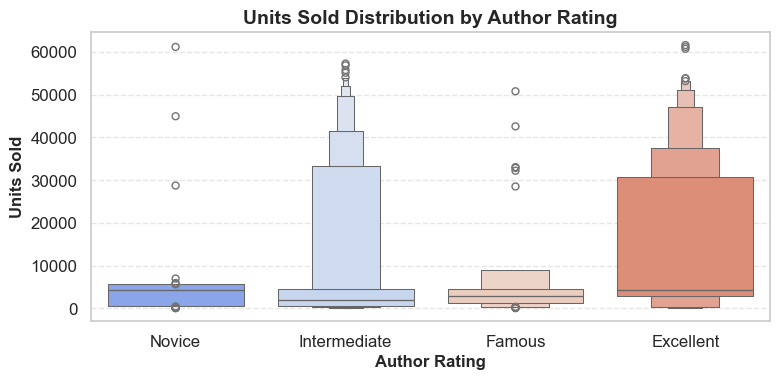

In [24]:
# Units Sold Distribution by Author Rating

plt.figure(figsize=(8,4))
sns.boxenplot(
    x = 'Author_Rating',
    y = 'units sold', 
    data = df, 
    palette = 'coolwarm'
)

plt.xlabel('Author Rating', fontsize = 12, fontweight = 'bold')
plt.ylabel('Units Sold', fontsize= 12, fontweight = 'bold') 
plt.title('Units Sold Distribution by Author Rating', fontsize = 14, fontweight = 'bold')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.savefig('Units Sold Distribution by Author Rating')
plt.show()

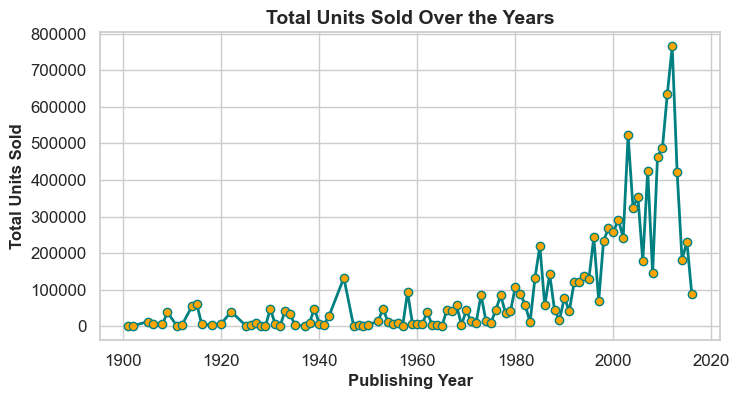

In [25]:
# Total Units Sold Over the Years

plt.figure(figsize=(8,4))
df.groupby('Publishing Year')['units sold'].sum().plot(
    kind = 'line',
    marker = 'o', 
    linestyle = '-', 
    color = 'teal', 
    linewidth = 2,  
    markerfacecolor = 'orange'
)

plt.xlabel('Publishing Year', fontsize= 12, fontweight = 'bold')
plt.ylabel('Total Units Sold',fontsize=12, fontweight = 'bold')
plt.title('Total Units Sold Over the Years', fontsize=14, fontweight='bold')

plt.savefig('Total Units Sold Over the Years')
plt.show()